In [1]:
DATA_PATH =  f'..\\data\\processed\\1_preprocessed_df.pkl'


ROLE_COLS      = ['DevType']
TECH_COLS      = ['LanguageHaveWorkedWith',
                  'DatabaseHaveWorkedWith',
                  'PlatformHaveWorkedWith',
                  'WebframeHaveWorkedWith',
                  'MiscTechHaveWorkedWith',
                  'ToolsTechHaveWorkedWith',
                  'NEWCollabToolsHaveWorkedWith']

In [22]:
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px



from sklearn.preprocessing import MultiLabelBinarizer

In [3]:
raw_df = pd.read_pickle(DATA_PATH)

In [4]:
tech_df = raw_df[TECH_COLS]
tech_df.sample(1)

,LanguageHaveWorkedWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,WebframeHaveWorkedWith,MiscTechHaveWorkedWith,ToolsTechHaveWorkedWith,NEWCollabToolsHaveWorkedWith
35177,[],[],[],[],[],[],[]


In [5]:
raw_df[ROLE_COLS].iloc[62162]

DevType    []
Name: 62162, dtype: object

In [6]:
raw_df.head(5)

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,[],NaN,[],NaN,[],[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"[Employed, full-time]",Remote,"[Hobby, Contribute to open-source projects, Bo...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","[Books / Physical media, Colleague, Friend or ...",[Formal documentation provided by the owner of...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,"[DevOps function, Microservices, Automated tes...","Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"[Employed, full-time]","Hybrid (some remote, some in-person)","[Hobby, Professional development or self-paced...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","[Books / Physical media, Colleague, On the job...",[Formal documentation provided by the owner of...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,"[DevOps function, Microservices, Automated tes...","Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"[Employed, full-time]","Hybrid (some remote, some in-person)",[Hobby],"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","[Colleague, Friend or family member, Other onl...",[Formal documentation provided by the owner of...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,"[Automated testing, Continuous integration (CI...",NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"[Employed, full-time, Independent contractor, ...",Remote,"[Hobby, Contribute to open-source projects, Pr...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","[Books / Physical media, Online Courses or Cer...",[Formal documentation provided by the owner of...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,"[Microservices, Automated testing, Observabili...",Other,Appropriate in length,Neither easy nor difficult,23456.0


Handle Category Data  

In [7]:
df = raw_df.copy()
encoded_dfs = {}
for col in ROLE_COLS + TECH_COLS:
    print(col)
    binarizer = MultiLabelBinarizer()
    encoded_df = pd.DataFrame(binarizer.fit_transform(df[col]),
                               columns=binarizer.classes_,
                               index=df[col].index)
    encoded_dfs[col] = encoded_df


DevType
LanguageHaveWorkedWith
DatabaseHaveWorkedWith
PlatformHaveWorkedWith
WebframeHaveWorkedWith
MiscTechHaveWorkedWith
ToolsTechHaveWorkedWith
NEWCollabToolsHaveWorkedWith


In [8]:
df = pd.concat(encoded_dfs , axis = 1)
df

DevType                                           \
      Academic researcher Blockchain Cloud infrastructure engineer   
0                       0          0                             0   
1                       0          0                             0   
2                       0          0                             0   
3                       0          0                             0   
4                       0          0                             0   
...                   ...        ...                           ...   
89179                   0          0                             0   
89180                   0          0                             0   
89181                   0          0                             0   
89182                   0          0                             0   
89183                   0          0                             0   

                                                                              \
      Data or business analyst Data scientist or machine learning specialist   
0                            0                                             0   
1                            0                                             0   
2                            0                                             0   
3                            0                                             0   
4                            0                                             0   
...                        ...                                           ...   
89179                        0                                             0   
89180                        0                                             0   
89181                        0                                             0   
89182                        0                                             0   
89183                        0                                             0   

                                                                            \
      Database administrator Designer DevOps specialist Developer Advocate   
0                          0        0                 0                  0   
1                          0        0                 0                  0   
2                          0        0                 0                  0   
3                          0        0                 0                  0   
4                          0        0                 0                  0   
...                      ...      ...               ...                ...   
89179                      0        0                 0                  0   
89180                      0        0                 0                  0   
89181                      0        0                 0                  0   
89182                      0        0                 0                  0   
89183                      0        0                 0                  0   

                            ... NEWCollabToolsHaveWorkedWith               \
      Developer Experience  ...                       Spyder Sublime Text   
0                        0  ...                            0            0   
1                        0  ...                            0            0   
2                        0  ...                            0            0   
3                        0  ...                            0            0   
4                        0  ...                            0            0   
...                    ...  ...                          ...          ...   
89179                    0  ...                            0            1   
89180                    0  ...                            0            0   
89181                    0  ...                            0            0   
89182                    0  ...                            0            0   
89183                    0  ...                            0            0   

                                                 

## Plot Jobs Frequency

D:\End to End Data Science Projects\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\End to End Data Science Projects\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\End to End Data Science Projects\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


[Text(0, 0, '25735'),
 Text(0, 0, '13745'),
 Text(0, 0, '5071'),
 Text(0, 0, '3904'),
 Text(0, 0, '3080'),
 Text(0, 0, '2597'),
 Text(0, 0, '2033'),
 Text(0, 0, '1996'),
 Text(0, 0, '1845'),
 Text(0, 0, '1588')]

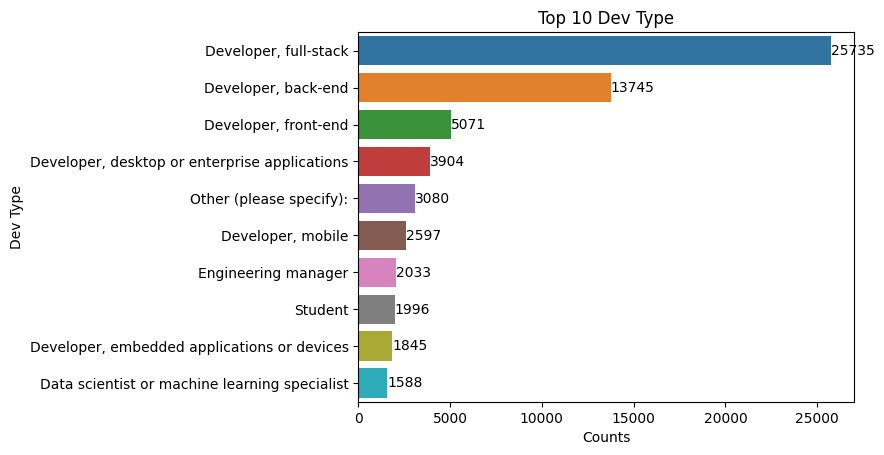

<Figure size 3000x1500 with 0 Axes>

In [20]:
job_freq = df['DevType'].copy().sum().sort_values(ascending=False).nlargest(10).reset_index()


fig1 , ax = plt.subplots()
sns.barplot(data= job_freq ,x = job_freq[0],y = job_freq['index'])
ax.set(ylabel='Dev Type',xlabel='Counts', title='Top 10 Dev Type')
plt.figure(figsize = (30 , 15))
ax.bar_label(ax.containers[0])

## Plot Skills Frequency


In [25]:
skills_freq = df.copy().drop(columns=['DevType'] , axis=1).sum().sort_values(ascending=False).reset_index()
columns_name = ['Group' , 'Skill' , 'freq']
skills_freq.columns = columns_name


fig2 = px.treemap(
    data_frame=skills_freq , 
    path= ['Group' , 'Skill'] , 
    values='freq' , color='freq' ,
    color_continuous_scale='deep')

fig2.update_layout(width =1500 , height = 700)
fig2.show()
